In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMapn_API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
# test sample
# for i, city in enumerate(cities[:3]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        # city_clouds = city_weather["weather"][0]["description"]
        city_wind = city_weather["wind"]["speed"]
        # city_wind = {
        #     "speed": city_weather["wind"]["speed"],
        #     "direction": city_weather["wind"]["deg"],
        #     "gust": city_weather["wind"]["gust"]
        # }
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # print(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | howard springs
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | road town
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | minas de marcona
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | chibougamau
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | ciudad bolivar
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | devinuwara
City not found. Skipping...

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,howard springs,-12.4970,131.0470,84.11,83,76,8.12,AU,1713002089
1,adamstown,-25.0660,-130.1015,71.56,59,46,10.04,PN,1713002090
2,hithadhoo,-0.6000,73.0833,84.47,72,10,4.74,MV,1713002091
3,road town,18.4167,-64.6167,77.04,73,100,21.12,VG,1713002092
4,badger,64.8000,-147.5333,33.67,80,100,13.80,US,1713002093


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howard springs,-12.4970,131.0470,84.11,83,76,8.12,AU,1713002089
1,adamstown,-25.0660,-130.1015,71.56,59,46,10.04,PN,1713002090
2,hithadhoo,-0.6000,73.0833,84.47,72,10,4.74,MV,1713002091
3,road town,18.4167,-64.6167,77.04,73,100,21.12,VG,1713002092
4,badger,64.8000,-147.5333,33.67,80,100,13.80,US,1713002093


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

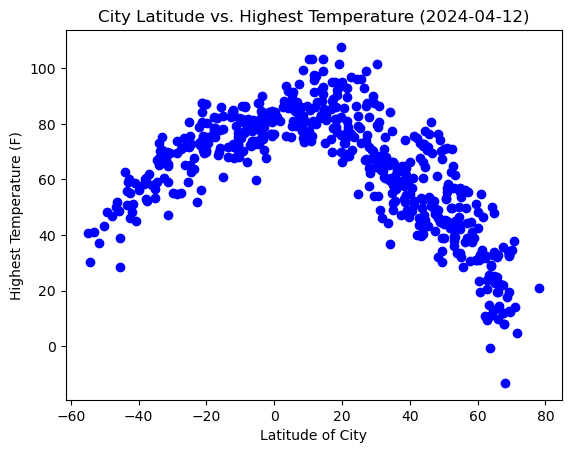

In [83]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']


# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('Highest Temperature (F)')
plt.title('City Latitude vs. Highest Temperature (2024-04-12)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

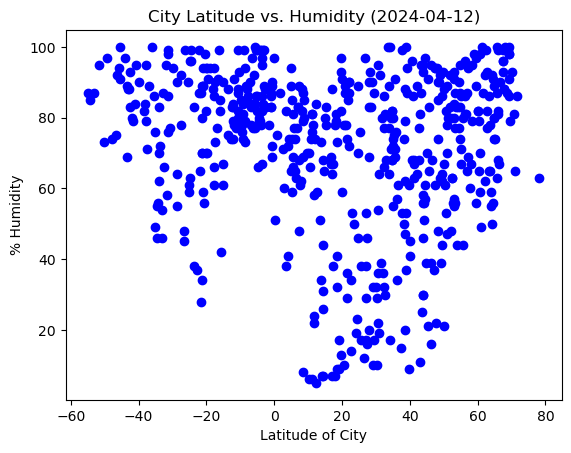

In [84]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']


# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('% Humidity')
plt.title('City Latitude vs. Humidity (2024-04-12)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

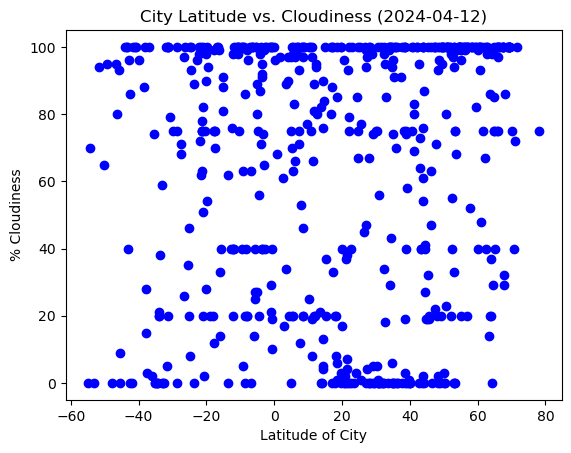

In [85]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']


# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('% Cloudiness')
plt.title('City Latitude vs. Cloudiness (2024-04-12)')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

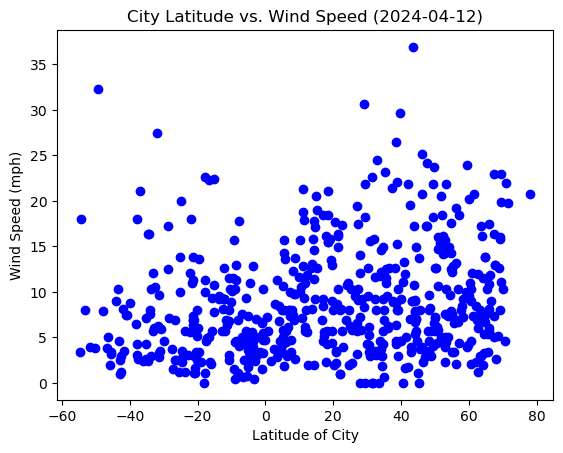

In [86]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']


# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (2024-04-12)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,road town,18.4167,-64.6167,77.04,73,100,21.12,VG,1713002092
4,badger,64.8000,-147.5333,33.67,80,100,13.80,US,1713002093
10,chibougamau,49.9168,-74.3659,44.22,93,100,12.66,CA,1713002099
17,ciudad bolivar,8.1222,-63.5497,77.41,82,100,12.33,VE,1713002107
18,ilulissat,69.2167,-51.1000,19.42,86,100,8.05,GL,1713002108


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howard springs,-12.4970,131.0470,84.11,83,76,8.12,AU,1713002089
1,adamstown,-25.0660,-130.1015,71.56,59,46,10.04,PN,1713002090
2,hithadhoo,-0.6000,73.0833,84.47,72,10,4.74,MV,1713002091
5,minas de marcona,-15.2119,-75.1103,60.76,90,81,10.78,PE,1713002094
6,waitangi,-43.9535,-176.5597,62.82,97,100,8.99,NZ,1713002095


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.20937449012182638


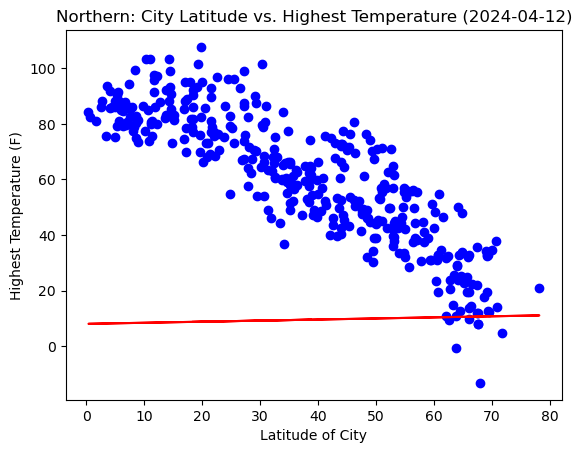

In [90]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# n_lat = northern_hemi_df['Lat']
# n_max_temp = (northern_hemi_df['Max Temp'])

# Build scatter plot for latitude vs. temperature
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Plot linear regression line
# slope = linregress(x, y).slope
# intercept = linregress(x, y).intercept
# r_value = linregress(x, y).rvalue
print("The r-value is:", r_value)

plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('Highest Temperature (F)')
plt.title('Northern: City Latitude vs. Highest Temperature (2024-04-12)')

# Show plot
plt.show()

The r-value is: 0.20937449012182638


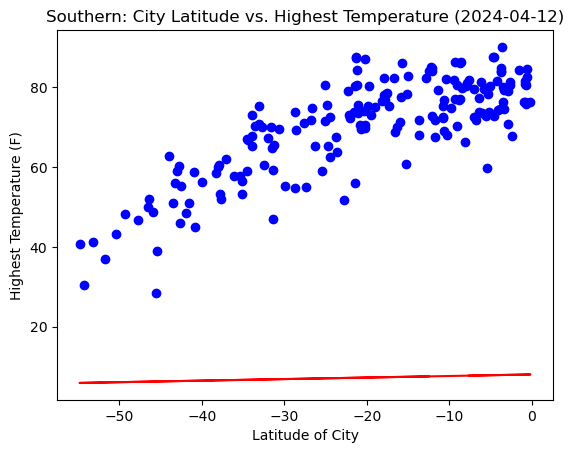

In [91]:
# Linear regression on Southern Hemisphere
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# s_lat = southern_hemi_df['Lat']
# s_max_temp = (southern_hemi_df['Max Temp'])

# Build scatter plot for latitude vs. temperature
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Plot linear regression line
# slope = linregress(x, y).slope
# intercept = linregress(x, y).intercept
# r_value = linregress(x, y).rvalue
print("The r-value is:", r_value)

plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('Highest Temperature (F)')
plt.title('Southern: City Latitude vs. Highest Temperature (2024-04-12)')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20937449012182638


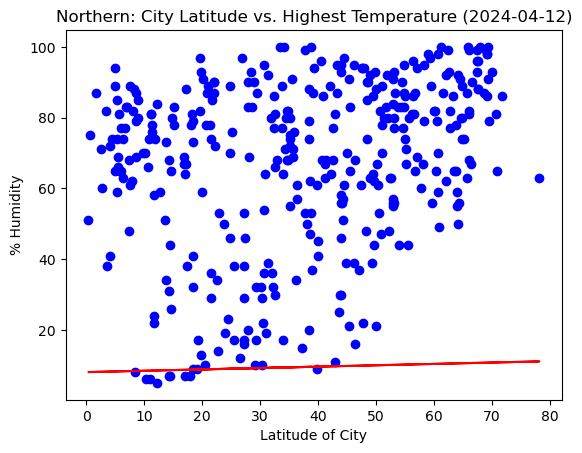

In [92]:
# Northern Hemisphere
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# n_lat = northern_hemi_df['Lat']
# n_humidity = (southern_hemi_df['Humidity'])

# Build scatter plot for latitude vs. humidity
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Plot linear regression line
# slope = linregress(x, y).slope
# intercept = linregress(x, y).intercept
# r_value = linregress(x, y).rvalue
print("The r-value is:", r_value)

plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('% Humidity')
plt.title('Northern: City Latitude vs. Highest Temperature (2024-04-12)')

# Show plot
plt.show()

The r-value is: 0.20937449012182638


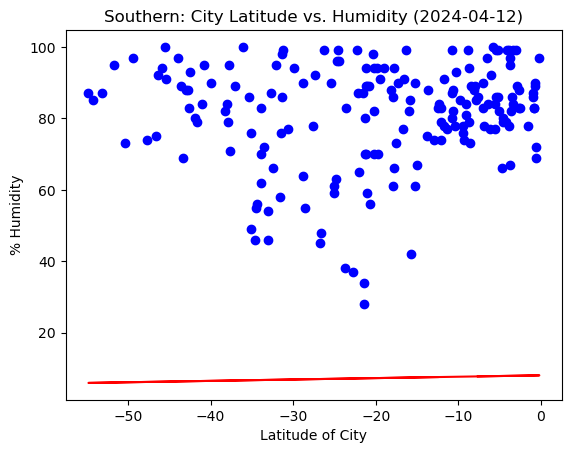

In [93]:
# Southern Hemisphere
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# s_lat = southern_hemi_df['Lat']
# s_humidity = (southern_hemi_df['Humidity'])

# Build scatter plot for latitude vs. humidity
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Plot linear regression line
# slope = linregress(x, y).slope
# intercept = linregress(x, y).intercept
# r_value = linregress(x, y).rvalue
print("The r-value is:", r_value)

plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('% Humidity')
plt.title('Southern: City Latitude vs. Humidity (2024-04-12)')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20937449012182638


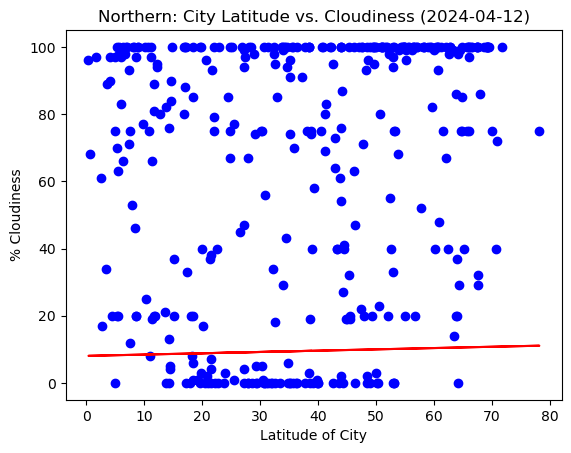

In [94]:
# Northern Hemisphere
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# n_lat = northern_hemi_df['Lat']
# n_cloudiness = (northern_hemi_df['Cloudiness'])

# Build scatter plot for latitude vs. cloudiness
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Plot linear regression line
# slope = linregress(x, y).slope
# intercept = linregress(x, y).intercept
# r_value = linregress(x, y).rvalue
print("The r-value is:", r_value)

plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('% Cloudiness')
plt.title('Northern: City Latitude vs. Cloudiness (2024-04-12)')

# Show plot
plt.show()

The r-value is: 0.20937449012182638


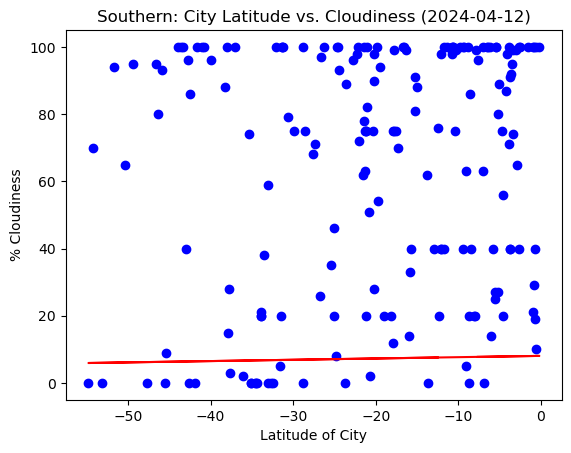

In [95]:
# Southern Hemisphere
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# s_lat = southern_hemi_df['Lat']
# s_cloudiness = (southern_hemi_df['Cloudiness'])

# Build scatter plot for latitude vs. cloudiness
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Plot linear regression line
# slope = linregress(x, y).slope
# intercept = linregress(x, y).intercept
# r_value = linregress(x, y).rvalue
print("The r-value is:", r_value)

plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('% Cloudiness')
plt.title('Southern: City Latitude vs. Cloudiness (2024-04-12)')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.20937449012182638


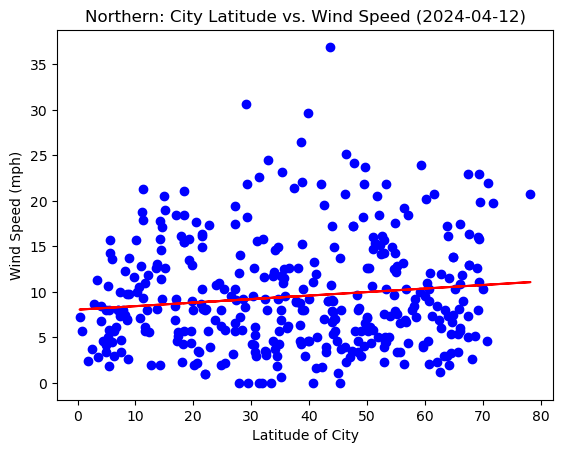

In [96]:
# Northern Hemisphere
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# n_lat = southern_hemi_df['Lat']
# n_wind = (southern_hemi_df['Wind Speed'])

# Build scatter plot for latitude vs. wind speed
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Plot linear regression line
# slope = linregress(x, y).slope
# intercept = linregress(x, y).intercept
# r_value = linregress(x, y).rvalue
print("The r-value is:", r_value)

plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern: City Latitude vs. Wind Speed (2024-04-12)')

# Show plot
plt.show()

The r-value is: 0.20937449012182638


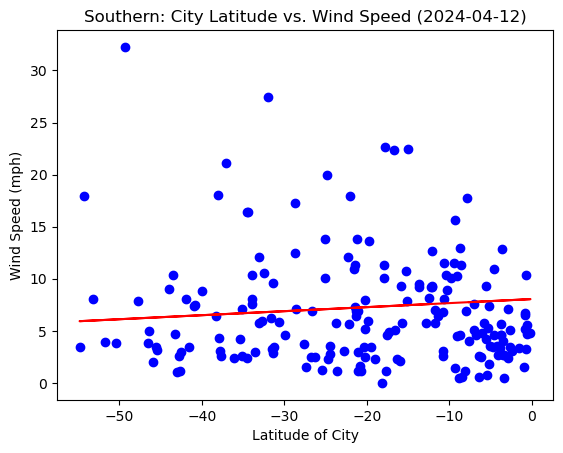

In [97]:
# Southern Hemisphere
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# s_lat = southern_hemi_df['Lat']
# s_wind = (southern_hemi_df['Wind Speed'])

# Build scatter plot for latitude vs. wind speed
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x, y, color='blue', marker='o')

# Plot linear regression line
# slope = linregress(x, y).slope
# intercept = linregress(x, y).intercept
# r_value = linregress(x, y).rvalue
print("The r-value is:", r_value)

plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Latitude of City')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern: City Latitude vs. Wind Speed (2024-04-12)')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE